In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = df[[2,3,4]]

In [4]:
#花弁の長さと幅の平均値
X.describe()

,2,3
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [5]:
np.cov(X[[2,3]],rowvar=0,bias=0)#bias=1：標本分散、bias=0：不偏分散

array([[ 3.11317942,  1.29638747],
       [ 1.29638747,  0.58241432]])

In [6]:
X[4].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

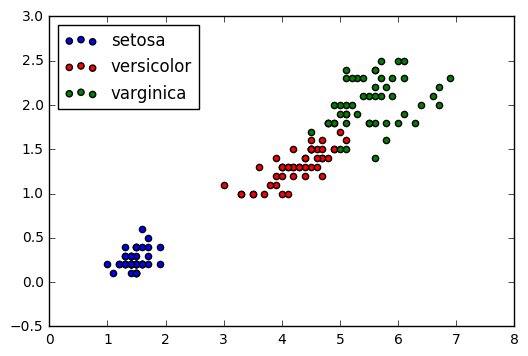

In [7]:
plt.scatter(X[X[4]=='Iris-setosa'][2],X[X[4]=='Iris-setosa'][3],label='setosa',c='b')
plt.scatter(X[X[4]=='Iris-versicolor'][2],X[X[4]=='Iris-versicolor'][3],label='versicolor',c='r')
plt.scatter(X[X[4]=='Iris-virginica'][2],X[X[4]=='Iris-virginica'][3],label='varginica',c='g')
plt.legend(loc='upper left')

In [8]:
#標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X[[2,3]].values)
X_std = sc.transform(X[[2,3]])

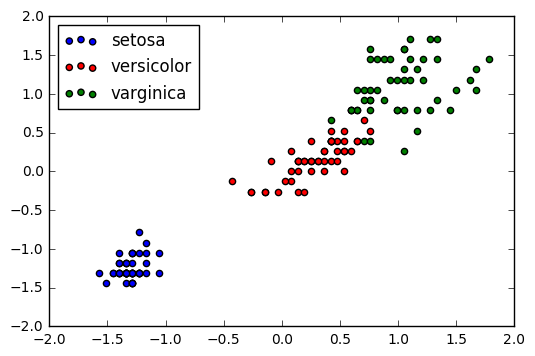

In [9]:
plt.scatter(X_std[(X[4]=='Iris-setosa').values][:,0],X_std[(X[4]=='Iris-setosa').values][:,1],label='setosa',c='b')
plt.scatter(X_std[(X[4]=='Iris-versicolor').values][:,0],X_std[(X[4]=='Iris-versicolor').values][:,1],label='versicolor',c='r')
plt.scatter(X_std[(X[4]=='Iris-virginica').values][:,0],X_std[(X[4]=='Iris-virginica').values][:,1],label='varginica',c='g')
plt.legend(loc='upper left')

In [10]:
#共分散行列の固有値及び、固有ベクトル
la,v = np.linalg.eig(np.cov(X[[2,3]],rowvar=0,bias=0))

In [11]:
la

array([ 3.65937449,  0.03621925])

In [12]:
v

array([[ 0.92154695, -0.38826694],
       [ 0.38826694,  0.92154695]])

In [13]:
#無相関化
X_noncor = np.dot(X[[2,3]],v)

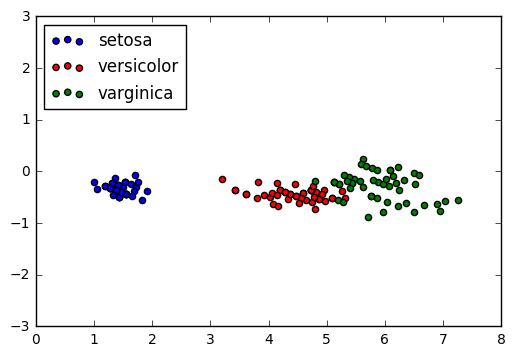

In [14]:
plt.scatter(X_noncor[(X[4]=='Iris-setosa').values][:,0],X_noncor[(X[4]=='Iris-setosa').values][:,1],label='setosa',c='b')
plt.scatter(X_noncor[(X[4]=='Iris-versicolor').values][:,0],X_noncor[(X[4]=='Iris-versicolor').values][:,1],label='versicolor',c='r')
plt.scatter(X_noncor[(X[4]=='Iris-virginica').values][:,0],X_noncor[(X[4]=='Iris-virginica').values][:,1],label='varginica',c='g')
plt.ylim((-3,3))
plt.legend(loc='upper left')

In [15]:
#無相関化したあとの、共分散行列
np.cov(X_noncor,rowvar=0,bias=0)

array([[  3.65937449e+00,   4.76874319e-17],
       [  4.76874319e-17,   3.62192472e-02]])

In [16]:
data = pd.read_csv('pima_train.csv')

In [17]:
data['type'] = (data['type'] == 'Yes')

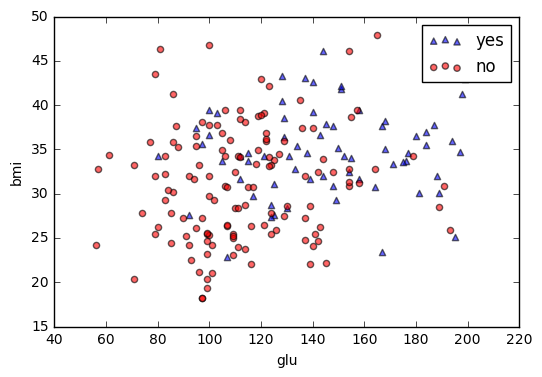

In [18]:
plt.scatter(data[data['type']==1].glu,data[data['type']==1].bmi,marker='^',c='b',alpha=0.6,label='yes')
plt.scatter(data[data['type']==0].glu,data[data['type']==0].bmi,marker='o',c='r',alpha=0.6,label='no')
plt.xlabel('glu')
plt.ylabel('bmi')
plt.legend(loc='upper right')

In [19]:
#教科書（4.32）を計算し、図示する。
class1 = data[data['type']==1][['glu','bmi']].as_matrix() #YES
class0 = data[data['type']==0][['glu','bmi']].as_matrix() #No

In [20]:
mu1 = np.array([class1.mean(axis=0)])
mu0 = np.array([class0.mean(axis=0)])

In [21]:
P1 = class1.shape[0] / float(data.shape[0])
P0 = class0.shape[0] / float(data.shape[0])

In [22]:
#covから
#http://decompose.hatenablog.com/entry/2016/04/10/060000
cov1 = np.cov(class1,rowvar=0)
cov0 = np.cov(class0,rowvar=0)

In [23]:
#識別関数の係数の計算 i=1,j=0
S_q = np.linalg.inv(cov1) - np.linalg.inv(cov0)
c_q = np.dot(mu0,np.linalg.inv(cov0)) - np.dot(mu1,np.linalg.inv(cov1))
F_q = np.dot(np.dot(mu1,np.linalg.inv(cov1)),mu1.T) - np.dot(np.dot(mu0,np.linalg.inv(cov0)),mu0.T) + np.log(np.linalg.det(cov0)/np.linalg.det(cov1)) - 2*np.log(P1/P0)


In [24]:
#識別関数
def identification(x,S,c,F):
    return np.dot(np.dot(x,S),x.T) + 2 * (np.dot(c,x.T)) + F

In [25]:
x = np.arange(50,210,1)
y = np.arange(15,50,1)
X,Y=np.meshgrid(x,y)
XY = np.array([X.ravel(),Y.ravel()]).T

In [26]:
z = []
for i in range(XY.shape[0]):
    z.append(identification(XY[i],S_q,c_q,F_q))

In [27]:
Z = np.array(z).reshape(X.shape)

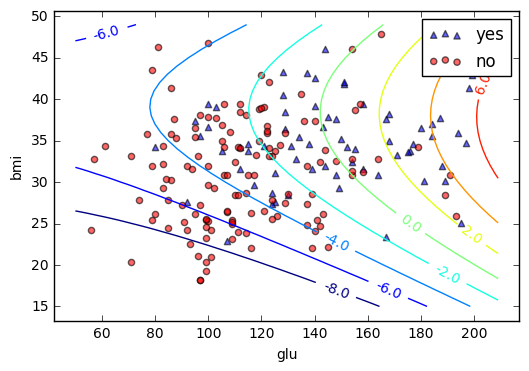

In [28]:
#二次識別関数
cont = plt.contour(X,Y,-Z,levels=[-8,-6,-4,-2,0,2,4,6,8])
cont.clabel(fmt='%1.1f',fontsize=10)
plt.scatter(data[data['type']==1].glu,data[data['type']==1].bmi,marker='^',c='b',alpha=0.6,label='yes')
plt.scatter(data[data['type']==0].glu,data[data['type']==0].bmi,marker='o',c='r',alpha=0.6,label='no')
plt.xlabel('glu')
plt.ylabel('bmi')
plt.legend(loc='upper right')

In [29]:
#線形識別関数
def linear_identification(x,c,F):
    return 2 * (np.dot(c,x.T)) + F

In [30]:
#2つの共分散行列が全く同じということは考えにくいので、2つの共分散行列をまとめる
cov_all = P1 * np.cov(class1,rowvar=0) + P0 * np.cov(class0,rowvar=0)
cov1 = cov_all
cov0 = cov_all

In [31]:
#識別関数の係数の計算 i=1,j=0
S_l = np.linalg.inv(cov1) - np.linalg.inv(cov0)
c_l = np.dot(mu0,np.linalg.inv(cov0)) - np.dot(mu1,np.linalg.inv(cov1))
F_l = np.dot(np.dot(mu1,np.linalg.inv(cov1)),mu1.T) - np.dot(np.dot(mu0,np.linalg.inv(cov0)),mu0.T) + np.log(np.linalg.det(cov0)/np.linalg.det(cov1)) - 2*np.log(P1/P0)


In [32]:
z = []
for i in range(XY.shape[0]):
    z.append(linear_identification(XY[i],c_l,F_l))

In [33]:
Z = np.array(z).reshape(X.shape)

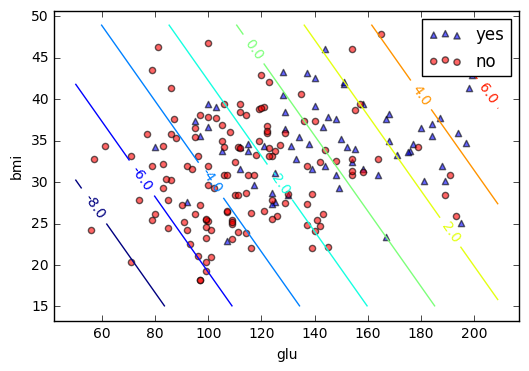

In [34]:
cont = plt.contour(X,Y,-Z,levels=[-8,-6,-4,-2,0,2,4,6,8])
cont.clabel(fmt='%1.1f',fontsize=10)
plt.scatter(data[data['type']==1].glu,data[data['type']==1].bmi,marker='^',c='b',alpha=0.6,label='yes')
plt.scatter(data[data['type']==0].glu,data[data['type']==0].bmi,marker='o',c='r',alpha=0.6,label='no')
plt.xlabel('glu')
plt.ylabel('bmi')
plt.legend(loc='upper right')

In [35]:
#再代入誤り率：二次識別関数
sample = data[['glu','bmi']].values
target = data['type']
result = []
for i in range(sample.shape[0]):
    value = -identification(sample[i],S_q,c_q,F_q)
    result.append((value>=0))

In [36]:
results = np.array(result).reshape(target.shape)
accuracy = (results==target).sum() / float(target.shape[0])
1 - accuracy #誤り率

0.245

In [37]:
#線形識別関数
result = []
for i in range(sample.shape[0]):
    value = -linear_identification(sample[i],c_l,F_l)
    result.append((value>=0))

In [38]:
results = np.array(result).reshape(target.shape)
accuracy = (results == target).sum() / float(target.shape[0])
1 - accuracy #誤り率

0.23999999999999999

In [39]:
#それぞれのサンプルで識別関数を計算し、識別境界値を-9〜+7の間で動かして、正誤値を求めてからROCを計算する。

In [40]:
target.shape

(200,)

In [41]:
from sklearn.metrics import auc,roc_curve

In [42]:
#二次識別子でのスコア
result_q = []
for i in range(sample.shape[0]):
    value = -identification(sample[i],S_q,c_q,F_q)
    result_q.append(value)
result_q = np.array(result_q).reshape(target.shape)

In [43]:
#線形識別子のスコア
result_l = []
for i in range(sample.shape[0]):
    value = -linear_identification(sample[i],c_l,F_l)
    result_l.append(value)
result_l = np.array(result_l).reshape(target.shape)

In [44]:
fpr_q,tpr_q,_q = roc_curve(target,result_q)
fpr_l,tpr_l,_l = roc_curve(target,result_l)

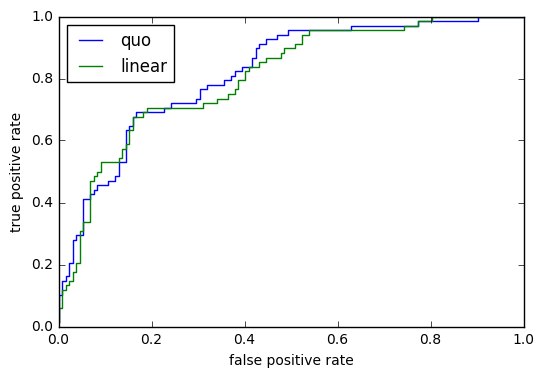

In [45]:
plt.plot(fpr_q,tpr_q,label='quo')
plt.plot(fpr_l,tpr_l,label='linear')
plt.legend(loc='upper left')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [46]:
print('二次識別子のAUC:%.3f') %auc(fpr_q,tpr_q)
print('線形識別子のAUC:%.3f') %auc(fpr_l,tpr_l)

二次識別子のAUC:0.820
線形識別子のAUC:0.808


In [48]:
_q

array([  5.43329015,   3.92645507,   3.90617363,   3.45104657,
         3.22362156,   3.06337939,   2.93574827,   2.54187488,
         2.37220069,   2.1782805 ,   1.42564994,   1.38075349,
         1.123716  ,   0.48971563,   0.4656877 ,   0.38050812,
         0.33766163,   0.23970525,   0.11566795,   0.01269618,
        -0.14360587,  -0.18097725,  -0.22250813,  -0.48547944,
        -0.51662614,  -0.61644265,  -0.68885622,  -1.13452047,
        -1.16611032,  -1.17185372,  -1.20093916,  -1.34208409,
        -1.49357266,  -1.5137204 ,  -1.75859413,  -1.7980276 ,
        -1.94671796,  -1.96313384,  -2.213961  ,  -2.33064886,
        -2.35573553,  -2.48387804,  -2.59261078,  -2.59414975,
        -2.74630278,  -2.75470412,  -2.80587727,  -2.88069822,
        -2.92490413,  -2.92917551,  -2.9750993 ,  -3.02202395,
        -3.10201885,  -3.16030074,  -3.18196286,  -3.24044728,
        -3.25950435,  -3.29438696,  -3.3148919 ,  -3.38899501,
        -3.57863676,  -3.58394029,  -3.73970748,  -3.74